# Parsing the Eora26 EE MRIO database

## Getting Eora26

The Eora 26 database is available at http://www.worldmrio.com . 
You need to register there and can than download the files from http://www.worldmrio.com/simplified .

## Parse

To parse a single year do:

In [1]:
import pymrio

In [2]:
eora_storage = '/tmp/mrios/eora26'

In [3]:
eora = pymrio.parse_eora26(year=2005, path=eora_storage)

/home/konstans/bin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Explore

Eora includes (almost) all countries:

In [4]:
eora.get_regions()

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       ...
       'TZA', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='region', length=189)

This can easily be aggregated to, for example, the OECD/NON_OECD countries with the help of the [country converter coco](https://github.com/konstantinstadler/country_converter).

In [5]:
import country_converter as coco

In [6]:
eora.aggregate(region_agg = coco.agg_conc(original_countries='Eora',
                                          aggregates=['OECD'],
                                          missing_countries='NON_OECD')
              )

In [7]:
eora.get_regions()

Index(['NON_OECD', 'OECD', 'Unspecified region'], dtype='object', name='region')

In [8]:
eora.calc_all()

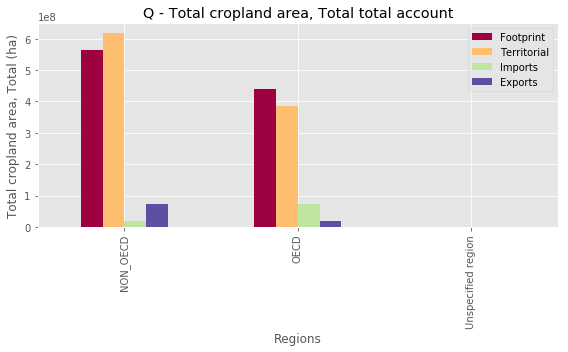

In [9]:
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    eora.Q.plot_account(('Total cropland area', 'Total'), figsize=(8,5))
    plt.show()

See the other notebooks for further information on [aggregation](../notebooks/aggregation_examples.ipynb) and [file io](../notebooks/load_save_export.ipynb).